In [17]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from skimage.measure import block_reduce, moments
import skimage.io

import eda

In [4]:
annotation = collman14v2['annotation']

In [6]:
annotation_unique = pd.unique(annotation.ravel())

annotation_unique = annotation_unique[1:]

annotation_unique

In [16]:
annotation.shape

(39, 7936, 9888)

In [28]:
annotation_reduced_unique = annotation_reduced_unique[1:]

In [49]:
annotation_reduced.shape

(39, 361, 450)

In [308]:
list(data.keys())

['annotation',
 'DAPI_2nd',
 'DAPI_3rd',
 'GABA',
 'GAD2',
 'gephyrin',
 'NR1',
 'PSDr',
 'synapsin',
 'VGluT1',
 'VGAT']

In [66]:
data = collman14v2['synapsin']

In [67]:
data = block_reduce(data, (1, 22, 22), np.mean)

In [381]:
df = pd.DataFrame(columns = ['location'], index=range(len(annotation_reduced_unique)*2))
df.location.loc[:len(df)/2] = 'on_synapse'
df.location.loc[len(df)/2:] = 'around_synapse'

In [117]:
pickle_in = open("centroids_collman14v2.pickle","rb")
centroids_collman14v2 = pickle.load(pickle_in)

In [385]:
for key, value in data.items():
    if key != 'annotation':
        a, b = eda.calculate_feature(centroids_collman14v2, 
                                     value, 
                                     data['annotation'], 
                                     (9, 11, 11), 
                                     value.shape, 
                                     'f1')
        tmp_df = pd.DataFrame(a+b, columns=[key])

        df = pd.concat([df, tmp_df], axis=1)
        #df[key], df['location'] = a+b, ['synapse']*len(a)+['around_synapse']*len(b)
        #df[key], df['location'] = b, ['around_synapse']*len(b)

    print('{} done'.format(key))

annotation done
DAPI_2nd done
DAPI_3rd done
GABA done
GAD2 done
gephyrin done
NR1 done
PSDr done
synapsin done
VGluT1 done
VGAT done


In [386]:
df['total'] = df.sum(axis=1)

In [424]:
df = df[df.total != 0]

In [269]:
df.columns

Index(['location', 'DAPI_2nd', 'DAPI_3rd', 'GABA', 'GAD2', 'gephyrin', 'NR1',
       'PSDr', 'synapsin', 'VGluT1', 'VGAT', 'total'],
      dtype='object')

In [388]:
columns = ['location', 'GABA', 'GAD2', 'gephyrin', 'NR1',
       'PSDr', 'synapsin', 'VGluT1', 'VGAT']

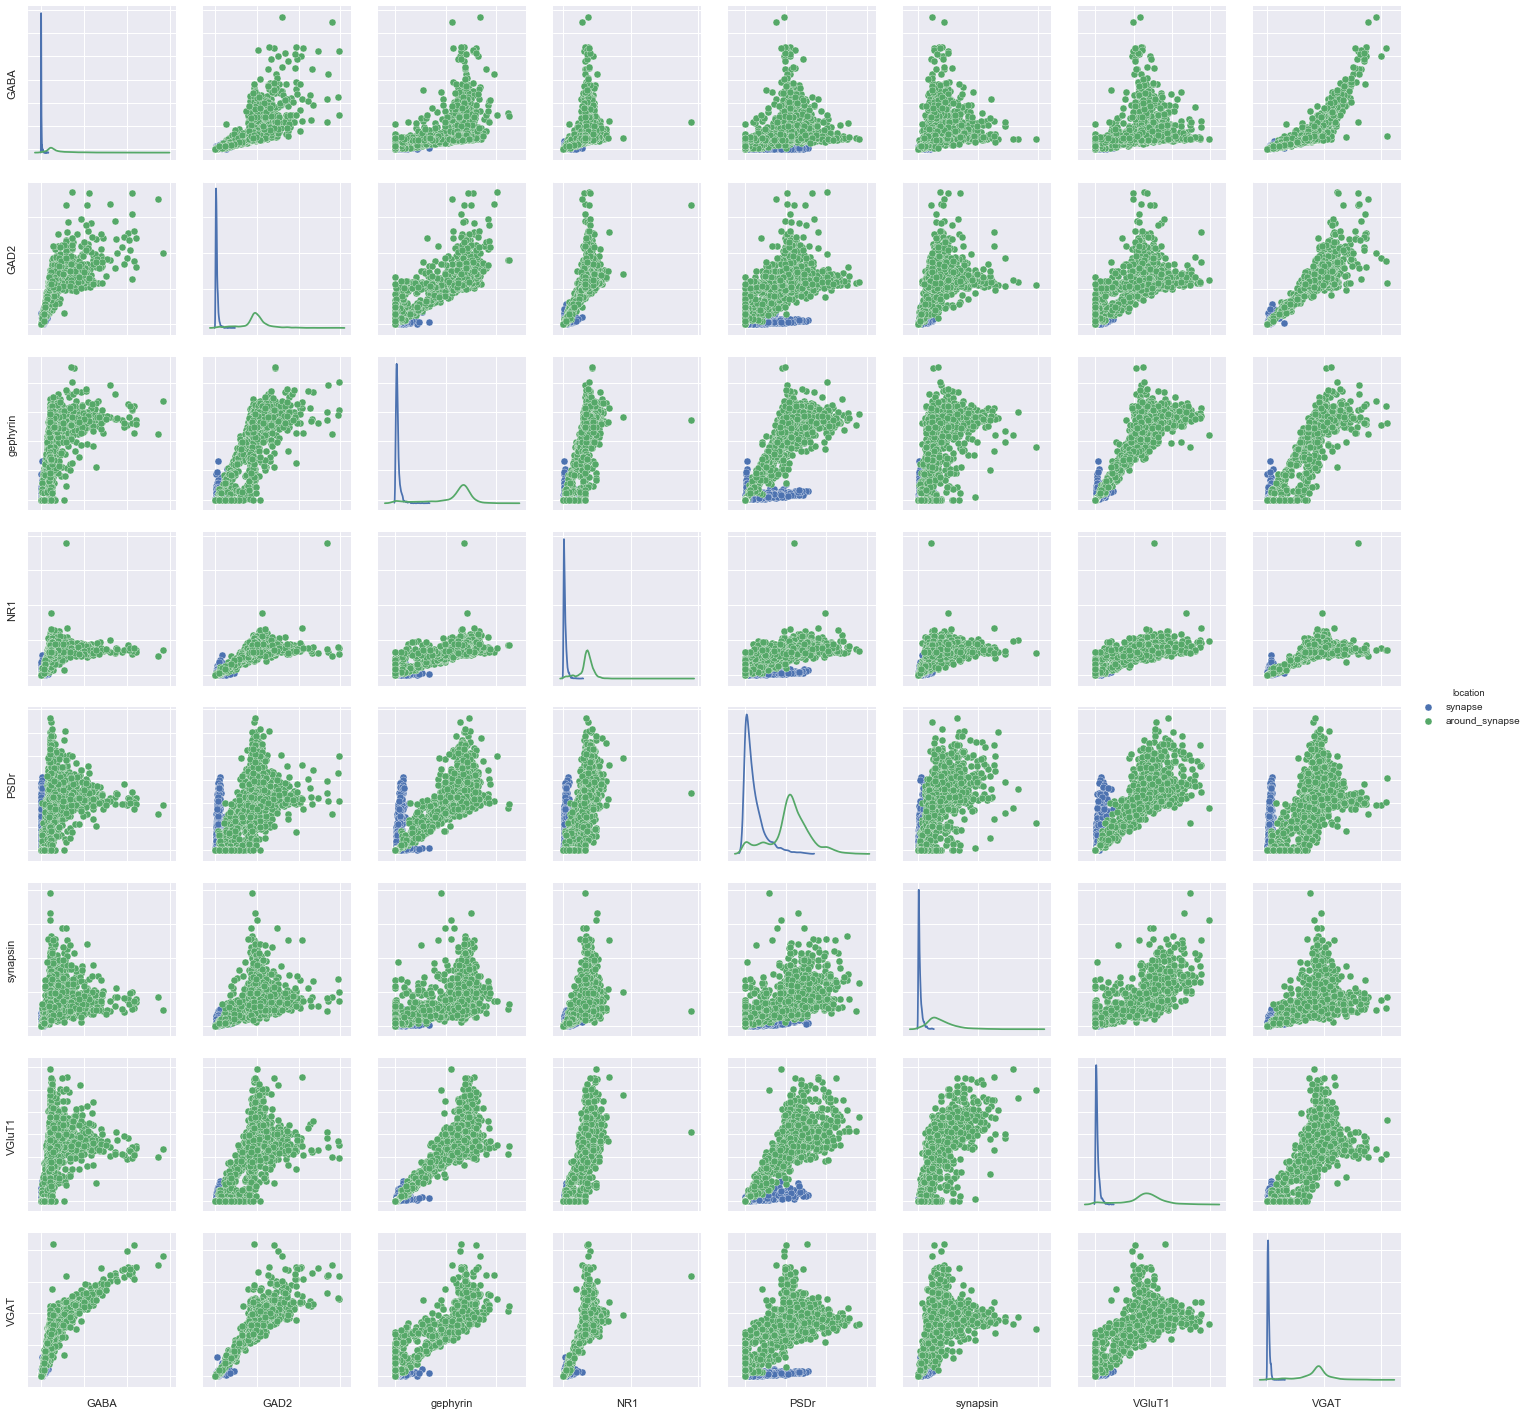

In [425]:
g = sns.pairplot(df[columns], hue="location", diag_kind='kde')
g.set(xticklabels=[], yticklabels=[])
g.fig

In [426]:
log_transformed_df = df[
[ 'GABA', 'GAD2', 'gephyrin', 'NR1',
       'PSDr', 'synapsin', 'VGluT1', 'VGAT']].transform(lambda x: np.log(x))

log_transformed_df['location'] = df['location']

/Users/jaewonc78/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


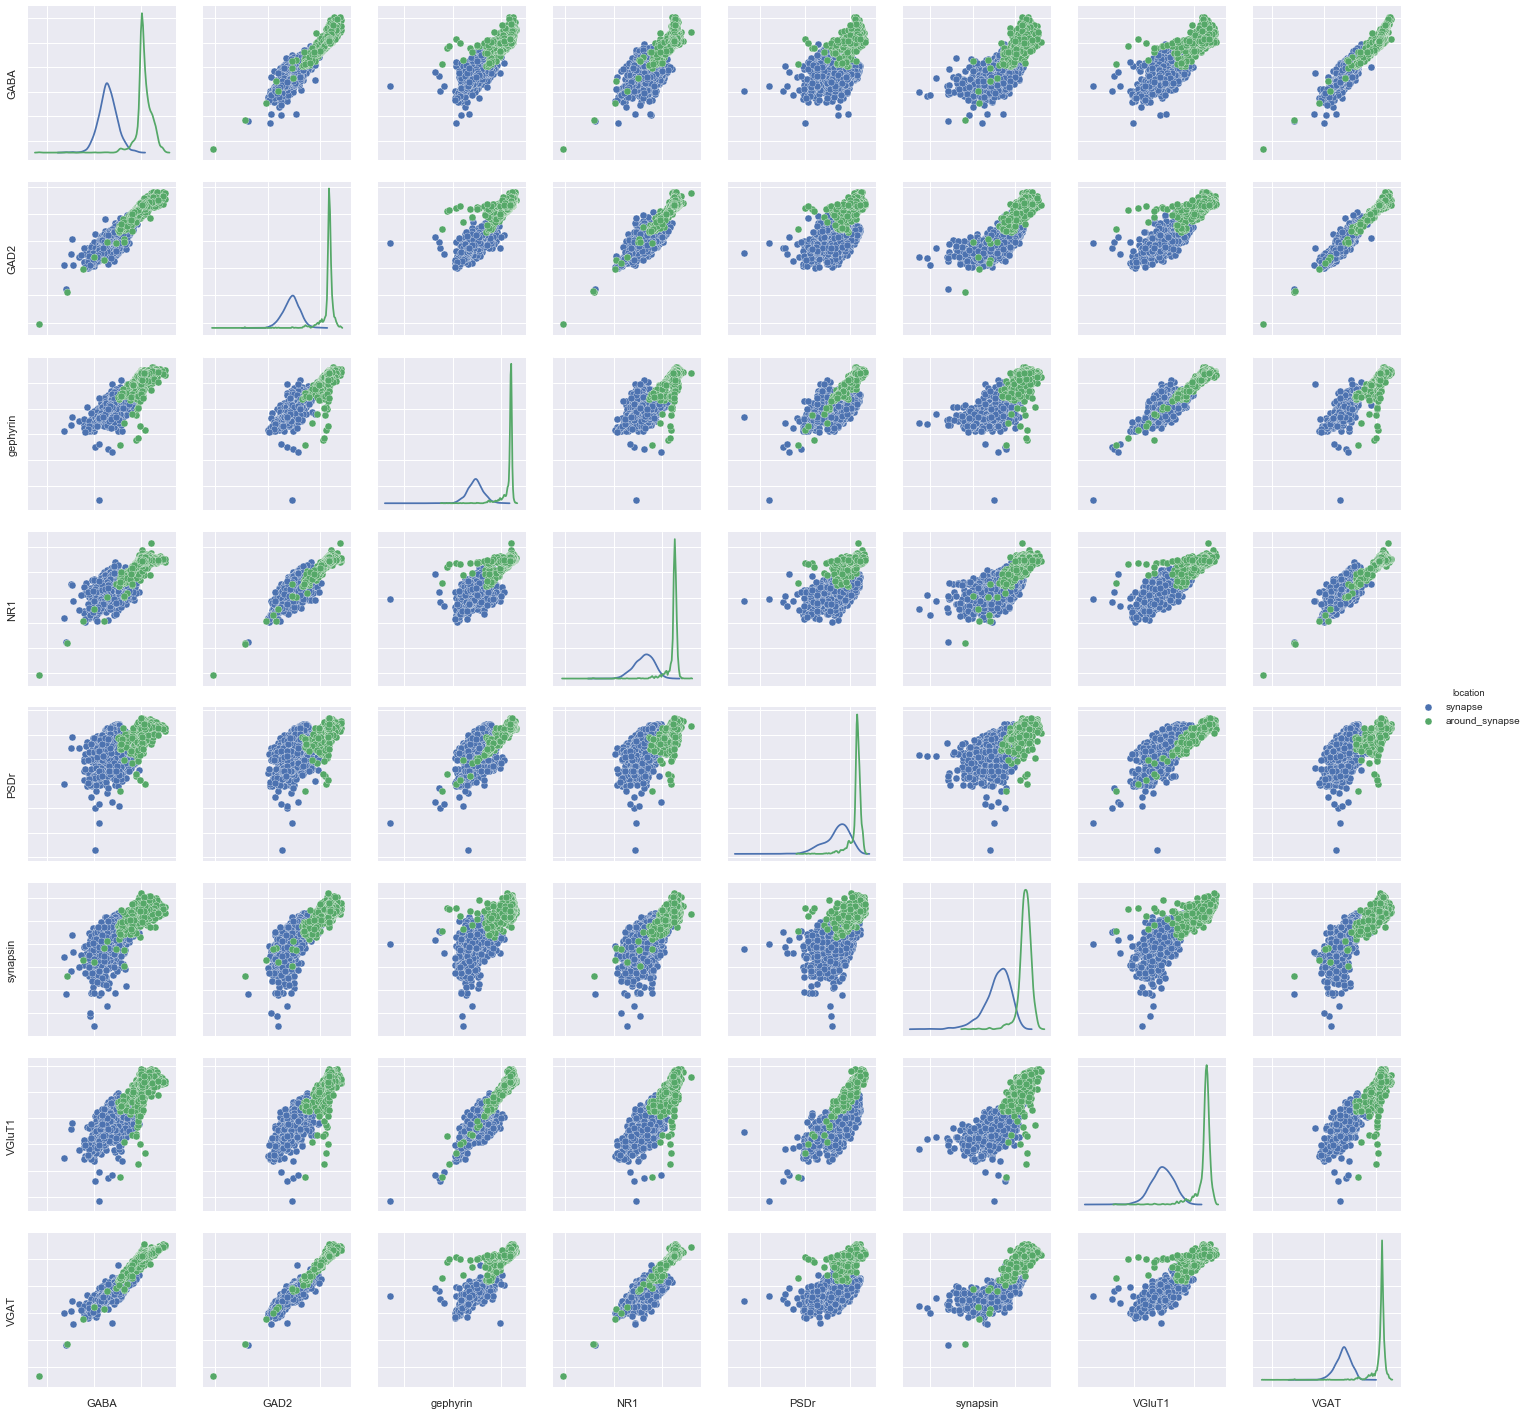

In [427]:
h = sns.pairplot(log_transformed_df[columns], hue="location", diag_kind='kde')
h.set(xticklabels=[], yticklabels=[])
h.fig